## NUTS2

### View data tendencies by region in production data

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prod2_df = pd.read_csv('../CSVs/Production_NUTS2_2019.csv', sep=",")
prod2_df.head(300)

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,11,Norte,2,2019,1312536063,1978.7
1,15,Algarve,2,2019,373196278,3709.5
2,16,Centro,2,2019,1786415564,2820.8
3,17,Área Metropolitana de Lisboa,2,2019,313163976,3451.5
4,18,Alentejo,2,2019,2441935279,1038.8
5,20,Região Autónoma dos Açores,2,2019,423978604,3514.6
6,30,Região Autónoma da Madeira,2,2019,107140853,23269.4


C:\Users\cespe\AppData\Local\Temp\ipykernel_22672\240476471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_name', y='p.value_eur', data=prod2_df, palette='viridis')


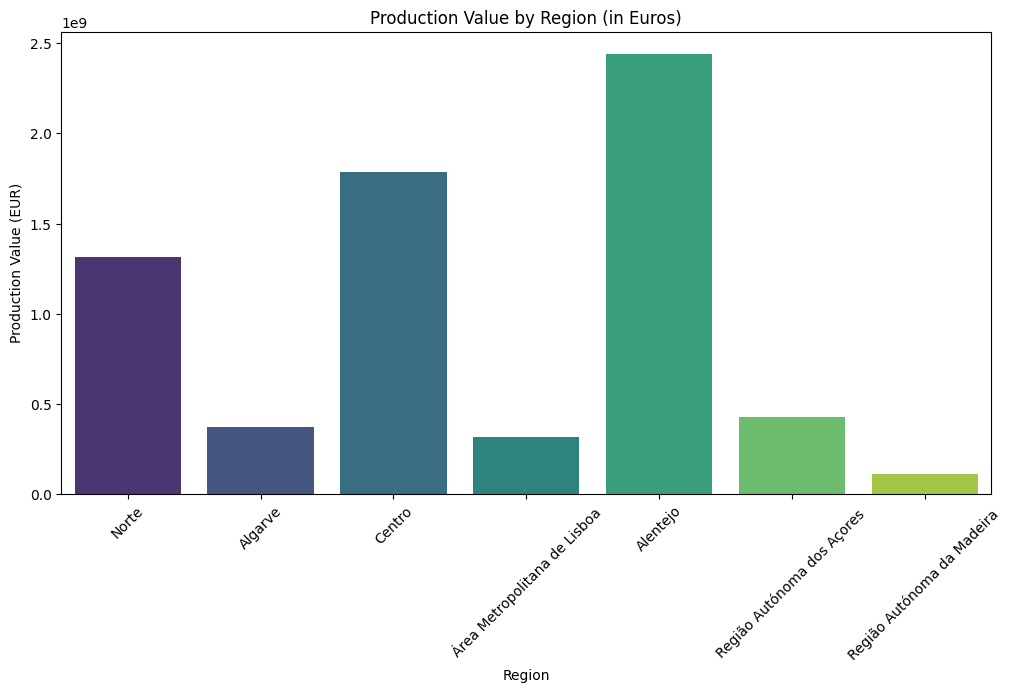

In [3]:
# Bar Chart of Production Value by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='p.value_eur', data=prod2_df, palette='viridis')
plt.title('Production Value by Region (in Euros)')
plt.xlabel('Region')
plt.ylabel('Production Value (EUR)')
plt.xticks(rotation=45)
plt.show()

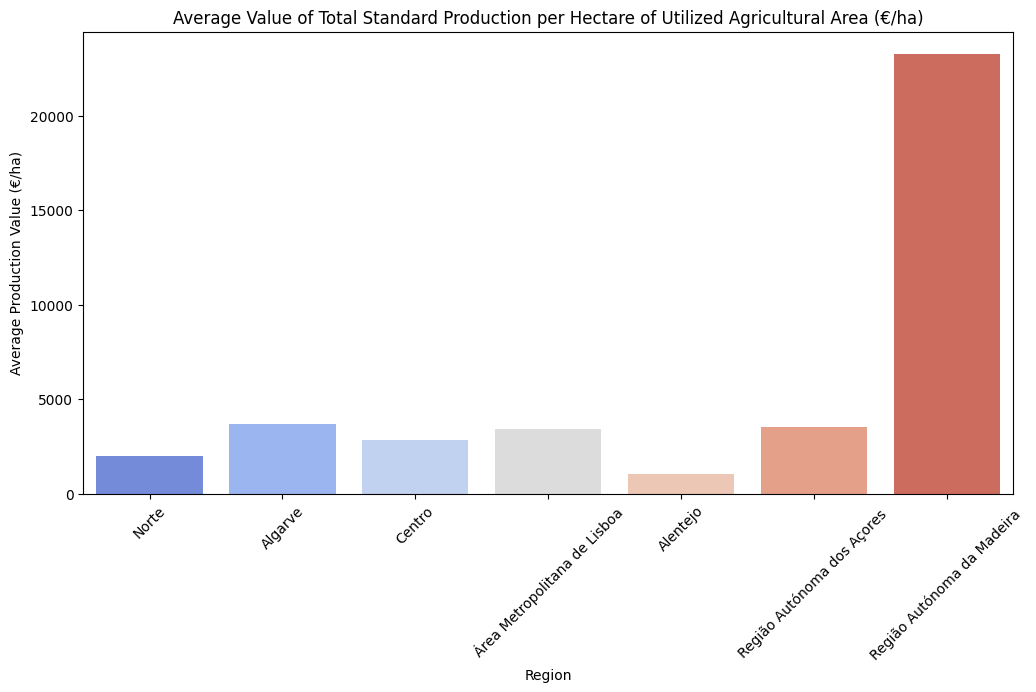

In [4]:
# Bar Chart of Average Production Value per Hectare by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='p.area_ha', hue='region_name', data=prod2_df, palette='coolwarm', dodge=False)
plt.title('Average Value of Total Standard Production per Hectare of Utilized Agricultural Area (€/ha)')
plt.xlabel('Region')
plt.ylabel('Average Production Value (€/ha)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Quitar la leyenda
plt.show()

### View data tendencies by region in labour data data (allready do It in 'Labour_education.ipynb')

In [5]:
# Load the data of labour 

labour_NUTS2_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
labour_NUTS2_df.head(100)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,11,Norte,2,2019,119432,Total labour force in agriculture
1,11,Norte,2,2019,93339,Family labour force
2,11,Norte,2,2019,50025,Holder
3,11,Norte,2,2019,28116,Spouse
4,11,Norte,2,2019,15198,Other family members
...,...,...,...,...,...,...
58,30,Região Autónoma da Madeira,2,2019,1927,Other family members
59,30,Região Autónoma da Madeira,2,2019,1538,Non-family labour force
60,30,Região Autónoma da Madeira,2,2019,716,Regular
61,30,Região Autónoma da Madeira,2,2019,766,Non-regular


In [6]:
lab_no_totals = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS2_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS2_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS2_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [7]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()

In [8]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [9]:
# Calculate the percentage of each labor type within each region
labour_NUTS2_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS2_df = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS2_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,percentage
1,11,Norte,2,2019,93339,Family labour force,78.15
2,11,Norte,2,2019,50025,Holder,41.89
3,11,Norte,2,2019,28116,Spouse,23.54
4,11,Norte,2,2019,15198,Other family members,12.73
5,11,Norte,2,2019,26092,Non-family labour force,21.85
6,11,Norte,2,2019,12515,Regular,10.48
7,11,Norte,2,2019,11186,Non-regular,9.37
8,11,Norte,2,2019,2392,Workers not hired by the holder,2.00
10,15,Algarve,2,2019,7134,Family labour force,52.00
11,15,Algarve,2,2019,4335,Holder,31.60


### Compare the relation between production and labour

In [10]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
prod2_df['region_name'] = prod2_df['region_name'].str.strip()
labour_NUTS2_df['region_name'] = labour_NUTS2_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
production_2019 = prod2_df[prod2_df['p.year'] == 2019]
labour_2019 = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
production_pivot = production_2019.pivot_table(values=['p.area_ha','p.value_eur'] , index='region_name', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='percentage', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([production_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

                            p.area_ha   p.value_eur  Family labour force  \
region_name                                                                
Alentejo                       1038.8  2.441935e+09                36.55   
Algarve                        3709.5  3.731963e+08                52.00   
Centro                         2820.8  1.786416e+09                75.20   
Norte                          1978.7  1.312536e+09                78.15   
Região Autónoma da Madeira    23269.4  1.071409e+08                85.60   

                            Holder  Non-family labour force  Non-regular  \
region_name                                                                
Alentejo                     23.91                    63.45        15.82   
Algarve                      31.60                    48.00         6.98   
Centro                       41.48                    24.80         7.53   
Norte                        41.89                    21.85         9.37   
Região Autó

                                 p.area_ha  p.value_eur  Family labour force  \
p.area_ha                         1.000000    -0.520651             0.526336   
p.value_eur                      -0.520651     1.000000            -0.307314   
Family labour force               0.526336    -0.307314             1.000000   
Holder                            0.495687    -0.395027             0.959147   
Non-family labour force          -0.526336     0.307314            -1.000000   
Non-regular                      -0.331531     0.687185            -0.714702   
Other family members              0.752616    -0.433940             0.931199   
Regular                          -0.540889     0.272630            -0.981699   
Spouse                            0.263872     0.004724             0.836151   
Workers not hired by the holder  -0.360625    -0.025745            -0.750114   

                                   Holder  Non-family labour force  \
p.area_ha                        0.495687        

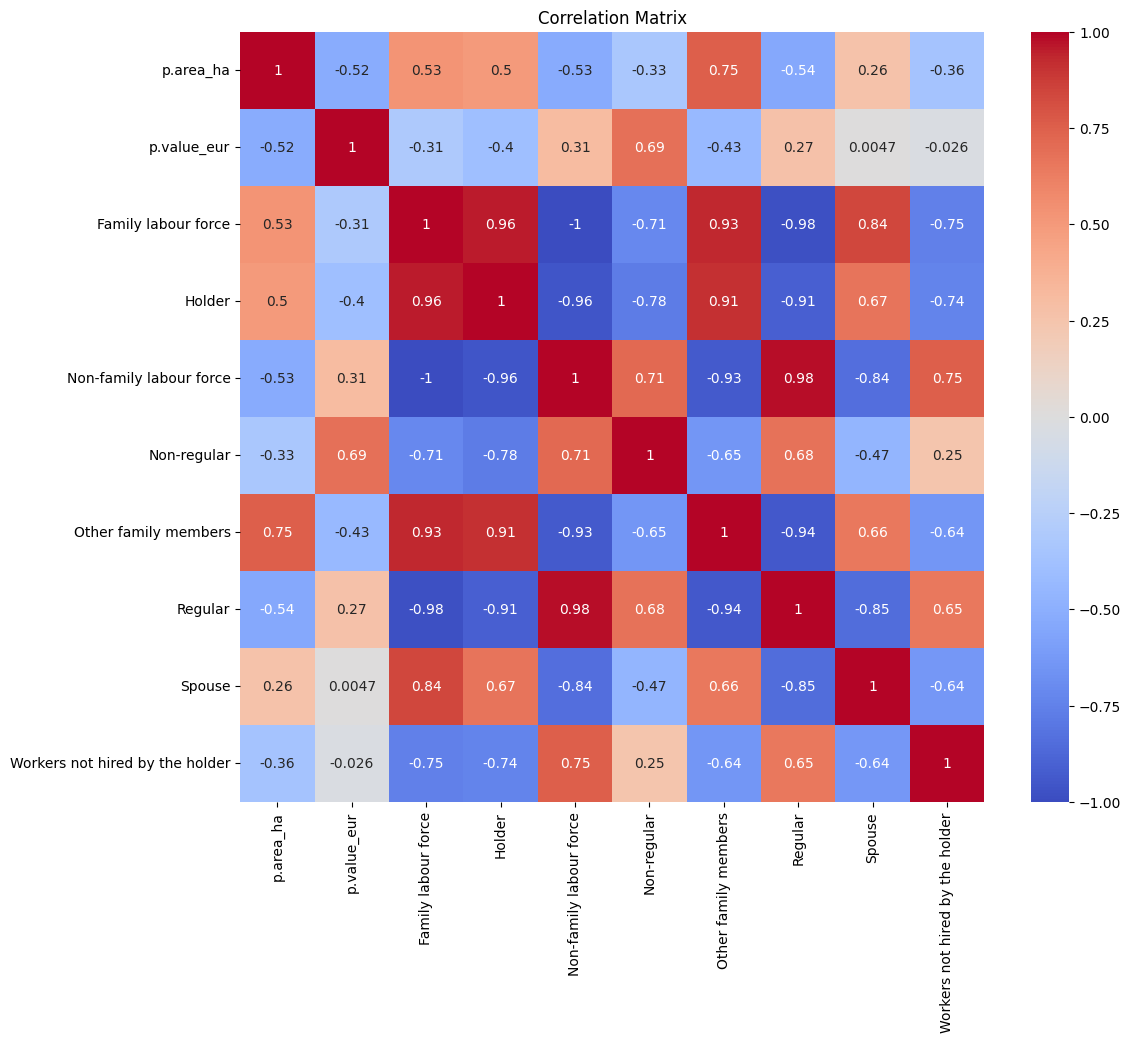

In [11]:
# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## NUTS4

### View data tendencies by region in production data

In [12]:
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")
prod4_df.head(300)

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5
1,1111602,Caminha,4,2019,3015466,1058.6
2,1111603,Melgaço,4,2019,5191947,494.9
3,1111604,Monção,4,2019,9358899,1577.4
4,1111605,Paredes de Coura,4,2019,5383718,1276.3
...,...,...,...,...,...,...
295,2004802,Santa Cruz das Flores,4,2019,2888209,1319.7
296,2004901,Corvo,4,2019,420922,443.1
297,3003101,Calheta,4,2019,9533627,21291.8
298,3003102,Câmara de Lobos,4,2019,12592196,19858.1


In [13]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
prod4_df['region_name_nuts2'] = prod4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
prod4_df.head(10)


,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte
5,1111606,Ponte da Barca,4,2019,4831458,572.9,Norte
6,1111607,Ponte de Lima,4,2019,20001117,2566.9,Norte
7,1111608,Valença,4,2019,4101833,2858.9,Norte
8,1111609,Viana do Castelo,4,2019,16334535,2145.3,Norte
9,1111610,Vila Nova de Cerveira,4,2019,2058865,1676.6,Norte


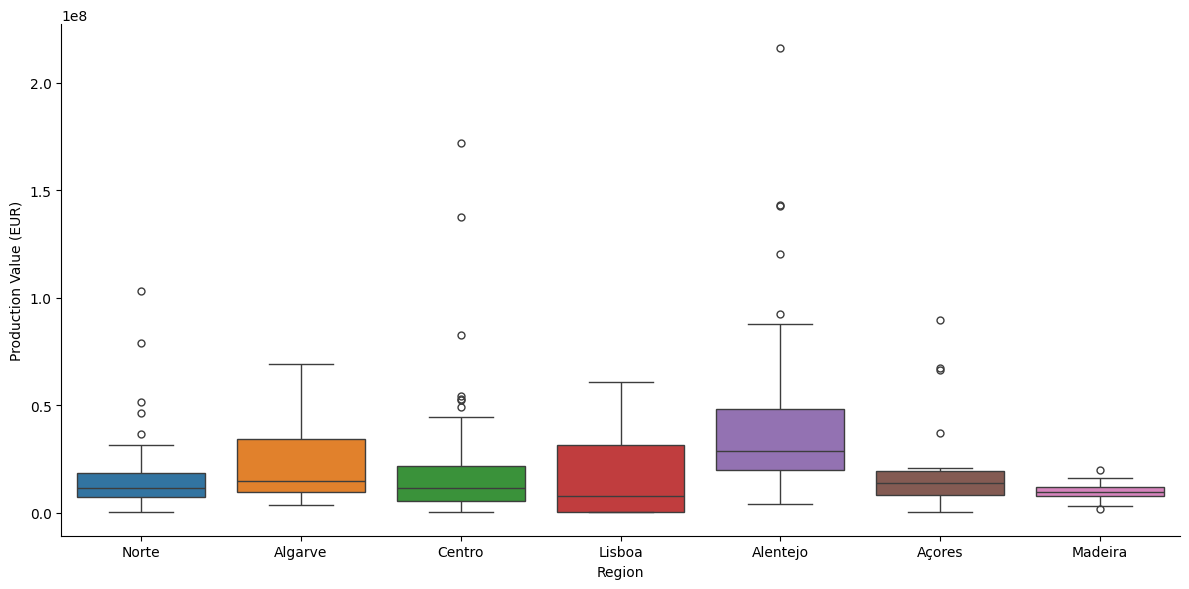

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=prod4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="p.value_eur", # Variable on y-axis: percentage
    hue="region_name_nuts2", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Region') # Label the x-axis
plt.ylabel('Production Value (EUR)') # y-axis label


# Show the chart
plt.show()

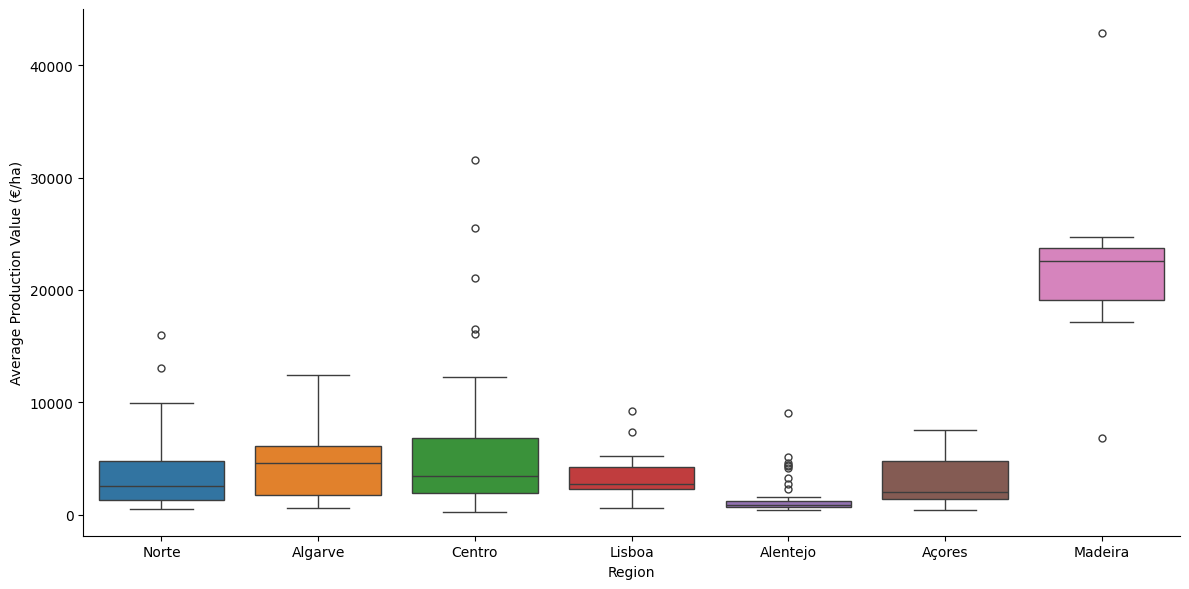

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=prod4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="p.area_ha", # Variable on y-axis: percentage
    hue="region_name_nuts2", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Region') # Label the x-axis
plt.ylabel('Average Production Value (€/ha)') # y-axis label


# Show the chart
plt.show()

### View data tendencies by region in labour data data (allready do It in 'Labour_education.ipynb')

In [16]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")

In [17]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)


In [18]:
lab_no_totals = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS4_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS4_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS4_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [19]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [20]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [21]:
# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS4_df = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS4_df.head()

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2,percentage
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,92.72
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,50.14
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,30.01
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,12.61
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte,7.28


### Compare the relation between production and labour

In [22]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
prod4_df['region_name'] = prod4_df['region_name'].str.strip()
labour_NUTS4_df['region_name'] = labour_NUTS4_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
production_2019 = prod4_df[prod4_df['p.year'] == 2019]
labour_2019 = labour_NUTS4_df[labour_NUTS4_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
production_pivot = production_2019.pivot_table(values=['p.area_ha','p.value_eur'] , index='region_name', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='percentage', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([production_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

                    p.area_ha  p.value_eur  Family labour force  Holder  \
region_name                                                               
Abrantes                887.9   12444308.0                59.95   33.47   
Aguiar da Beira        6464.9   21456912.0                87.39   45.09   
Alandroal               591.6   27701842.0                36.07   22.84   
Albergaria-a-Velha     5791.2   12702850.0                86.99   44.70   
Albufeira             12412.6   46565719.0                53.98   30.65   

                    Non-family labour force  Non-regular  \
region_name                                                
Abrantes                              40.05        19.76   
Aguiar da Beira                       12.61         4.69   
Alandroal                             63.93        37.49   
Albergaria-a-Velha                    13.01         1.89   
Albufeira                             46.02         6.68   

                    Other family members  Regular  Sp

   Production_data                       Labor_Type  Correlation
0        p.area_ha              Family labour force     0.103525
1        p.area_ha                           Holder     0.037419
2        p.area_ha                           Spouse     0.089763
3        p.area_ha             Other family members     0.214298
4        p.area_ha          Non-family labour force    -0.103525
5        p.area_ha                          Regular    -0.054868
6        p.area_ha                      Non-regular    -0.111914
7        p.area_ha  Workers not hired by the holder    -0.135864
8      p.value_eur              Family labour force    -0.497518
9      p.value_eur                           Holder    -0.469184
10     p.value_eur                           Spouse    -0.409132
11     p.value_eur             Other family members    -0.355095
12     p.value_eur          Non-family labour force     0.497518
13     p.value_eur                          Regular     0.448925
14     p.value_eur       

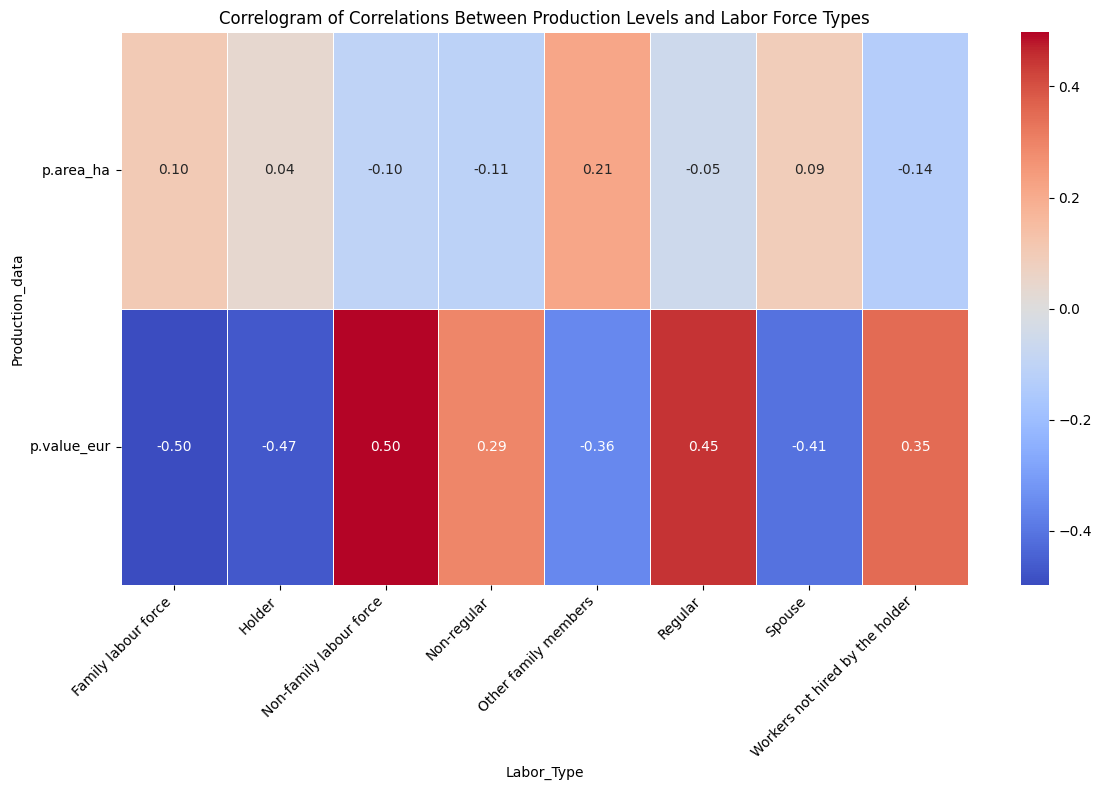

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los datos de producción y tipos de fuerza laboral de interés
prod_data = ['p.area_ha', 'p.value_eur']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# Lista para almacenar los resultados de correlación
correlation_results = []

# Iterar sobre cada dato de producción y tipo de fuerza laboral
for datos_prod in prod_data:
    for tipo_labor in tipos_labor:
        # Filtrar los dataframes por dato de producción y tipo de fuerza laboral
        df_prod_filtrado = prod4_df[['region_name', datos_prod]]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_prod_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # Calcular la correlación entre las columnas relevantes
        correlacion = df_combinado[datos_prod].corr(df_combinado['percentage'])
        
        # Almacenar los resultados de correlación junto con los nombres de dato de producción y tipo de labor
        correlation_results.append({
            'Production_data': datos_prod,
            'Labor_Type': tipo_labor,
            'Correlation': correlacion
        })

# Crear un dataframe a partir de la lista de resultados de correlación
df_correlation = pd.DataFrame(correlation_results)

# Mostrar los resultados de correlación
print(df_correlation)

# Generar un correlograma
plt.figure(figsize=(12, 8))
correlation_matrix = df_correlation.pivot(index="Production_data", columns="Labor_Type", values="Correlation")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")
plt.title('Correlogram of Correlations Between Production Levels and Labor Force Types')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


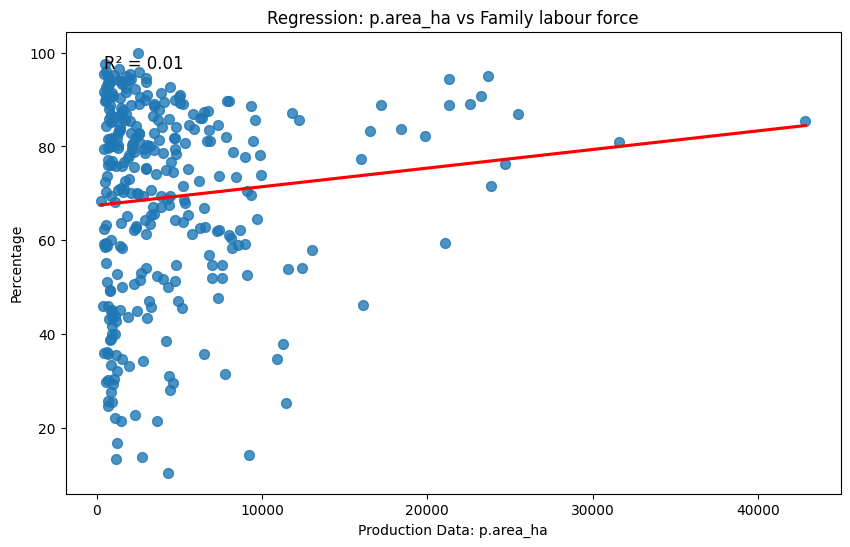

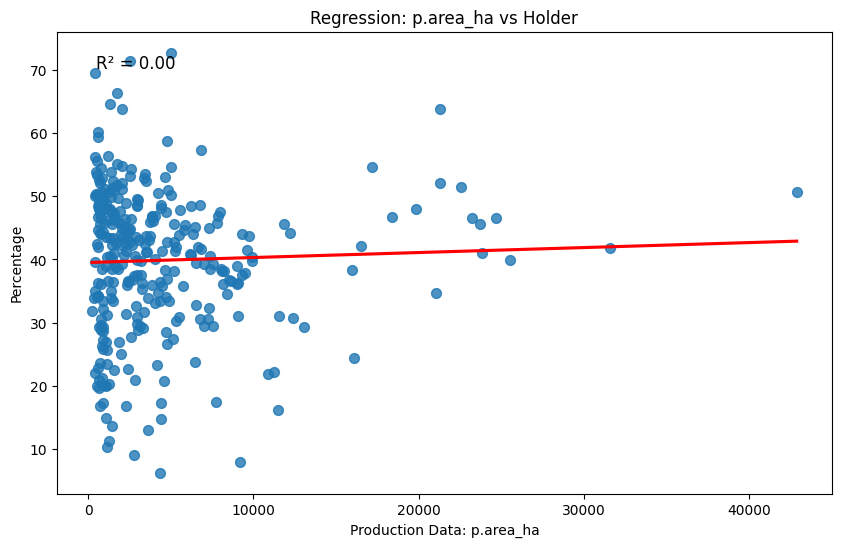

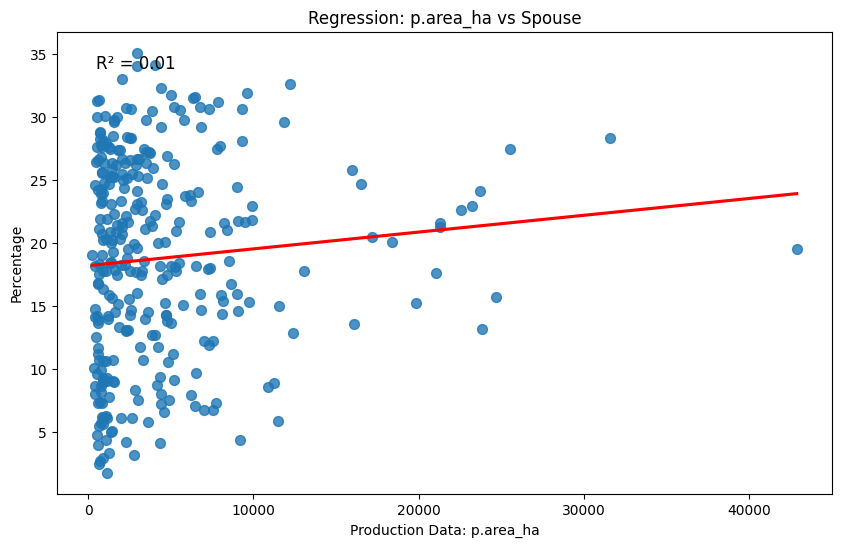

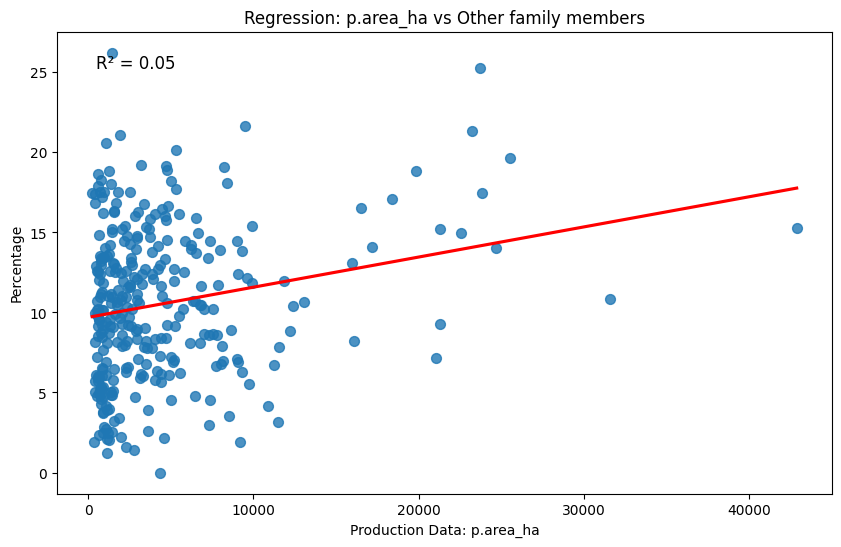

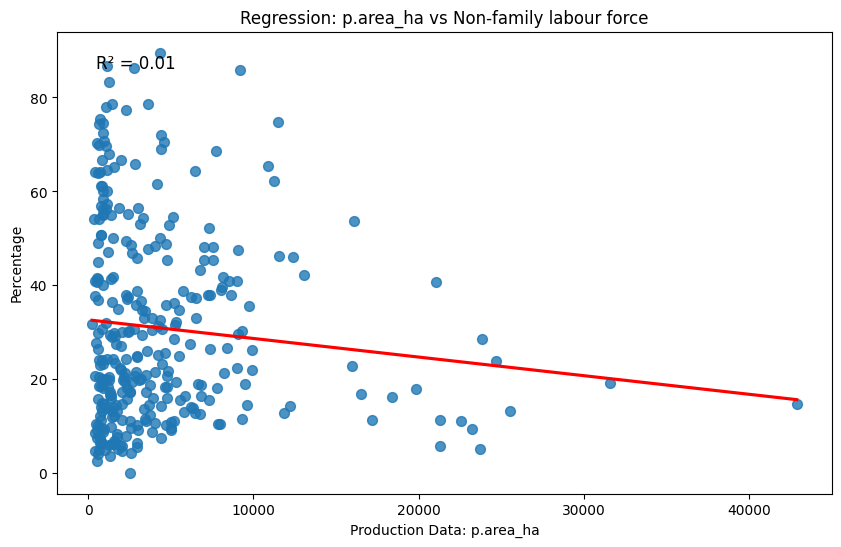

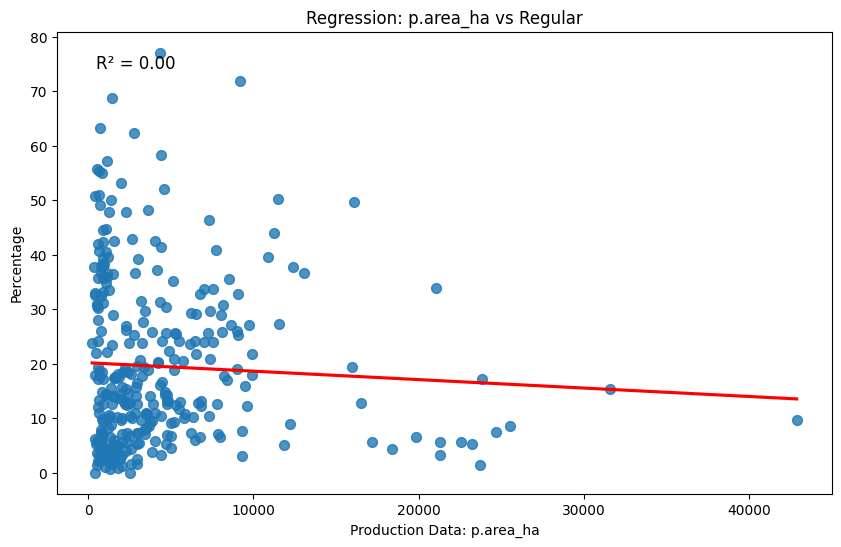

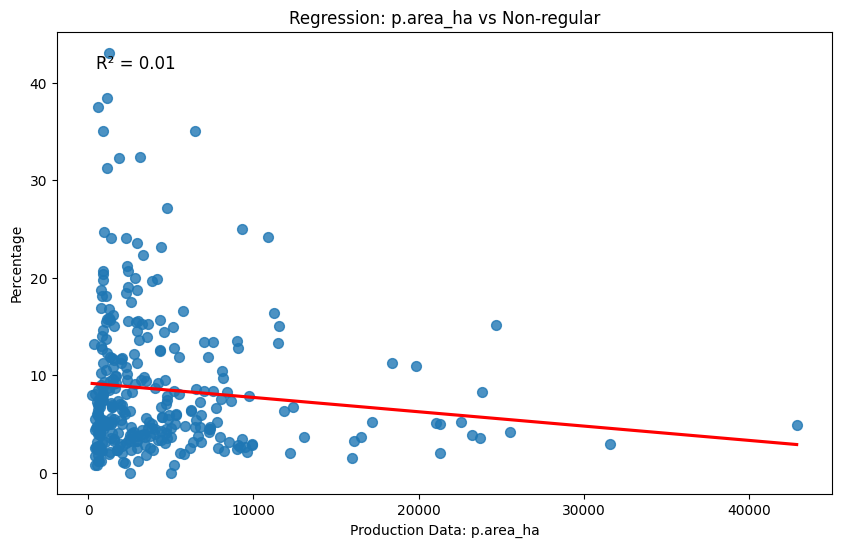

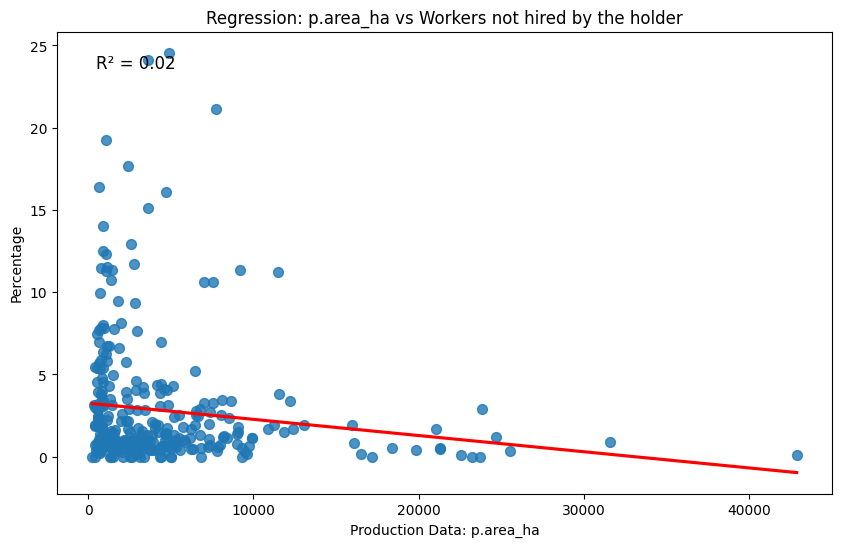

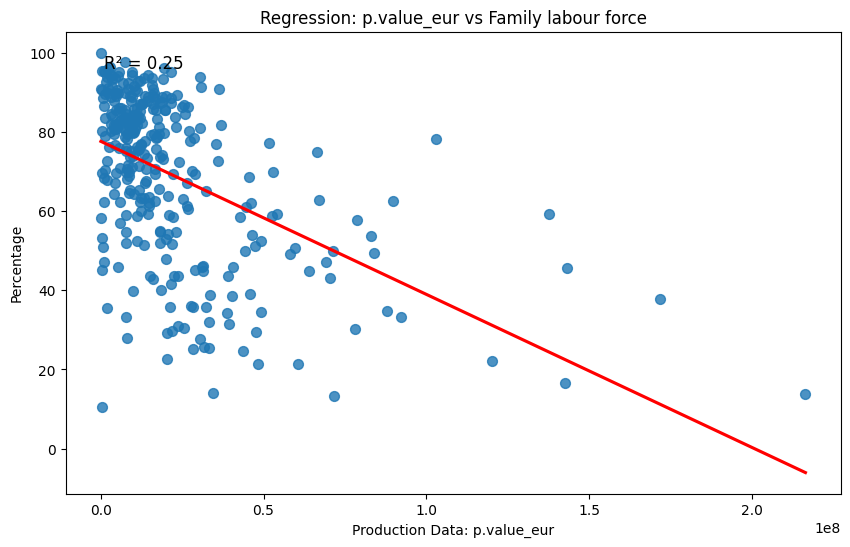

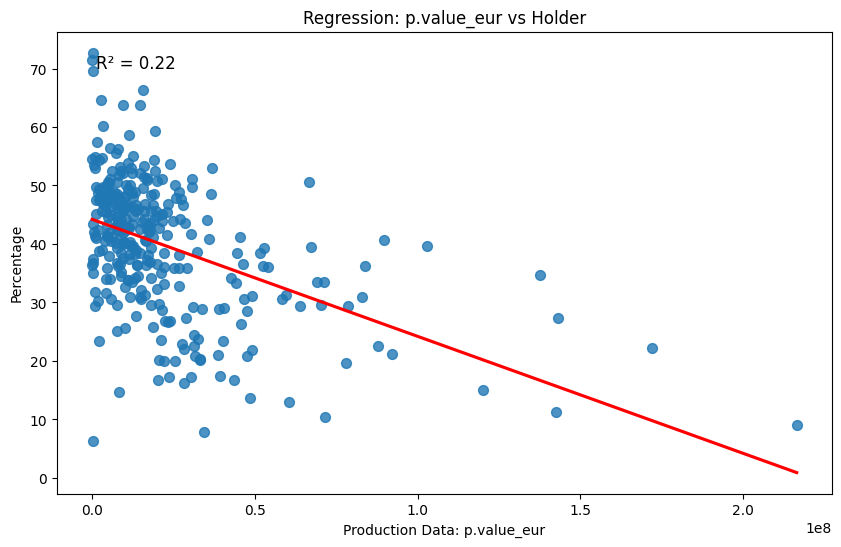

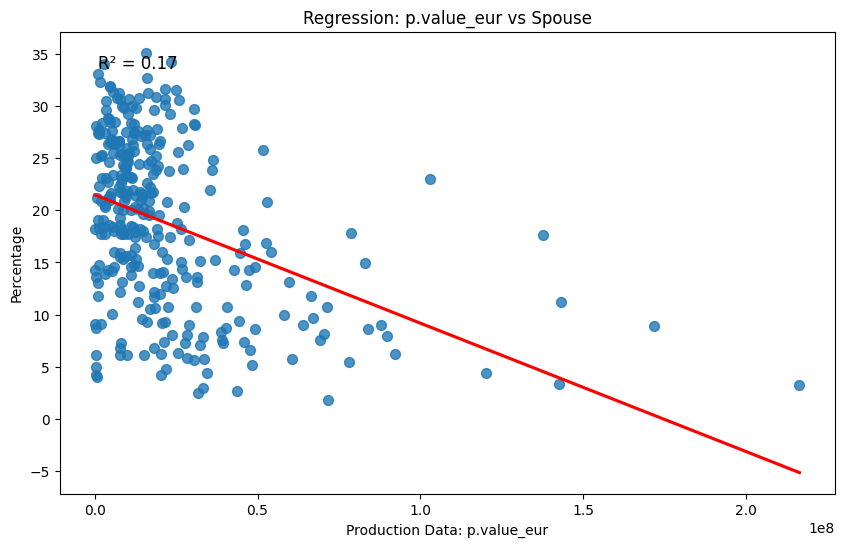

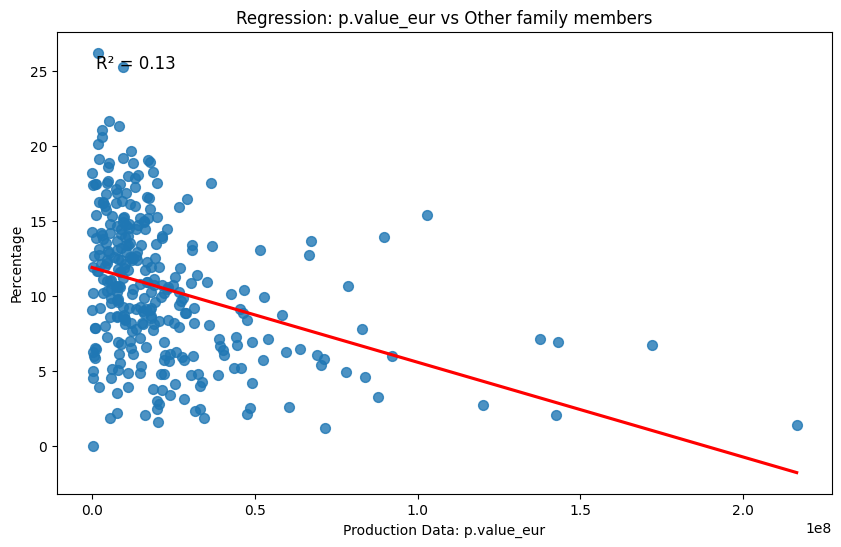

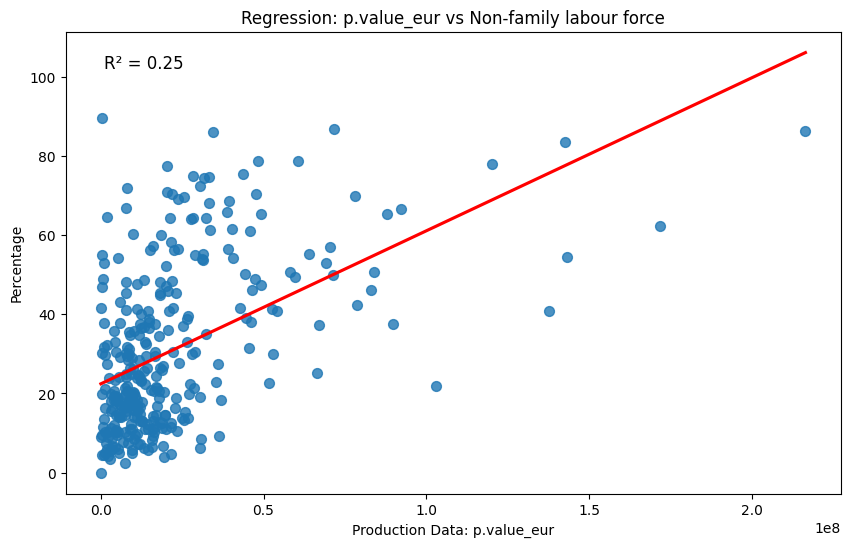

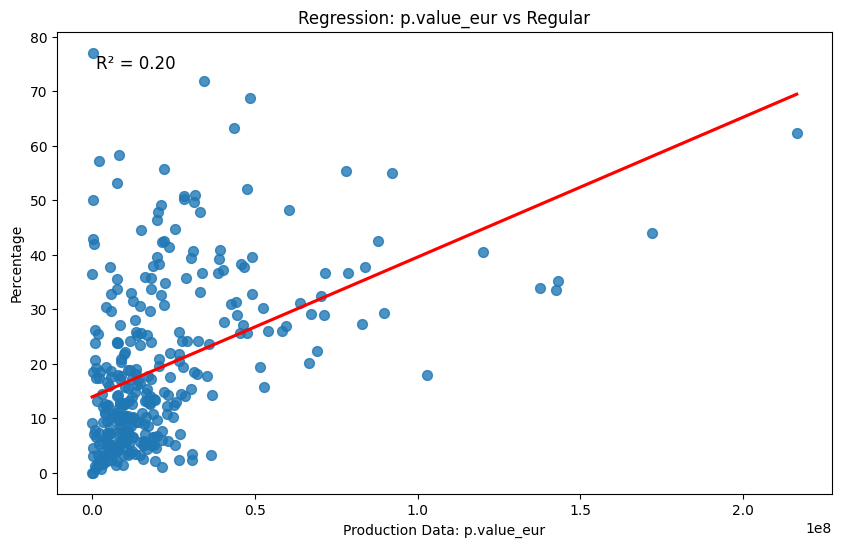

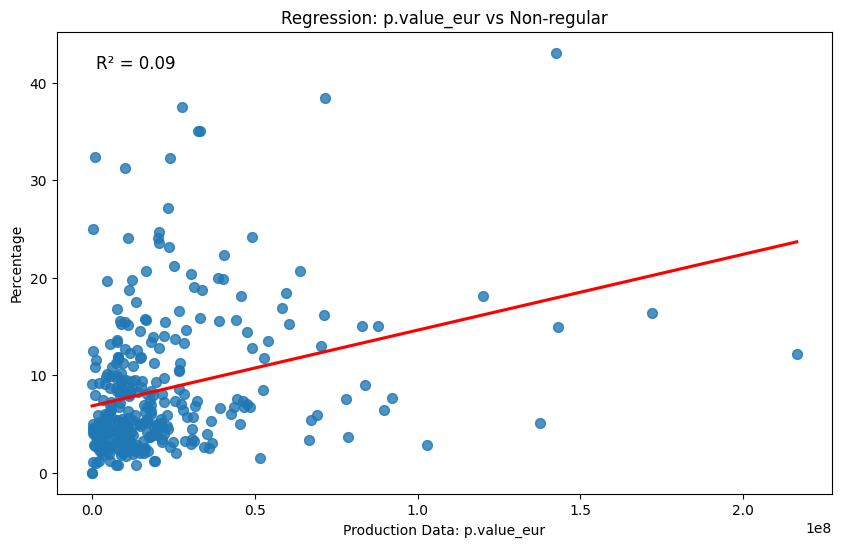

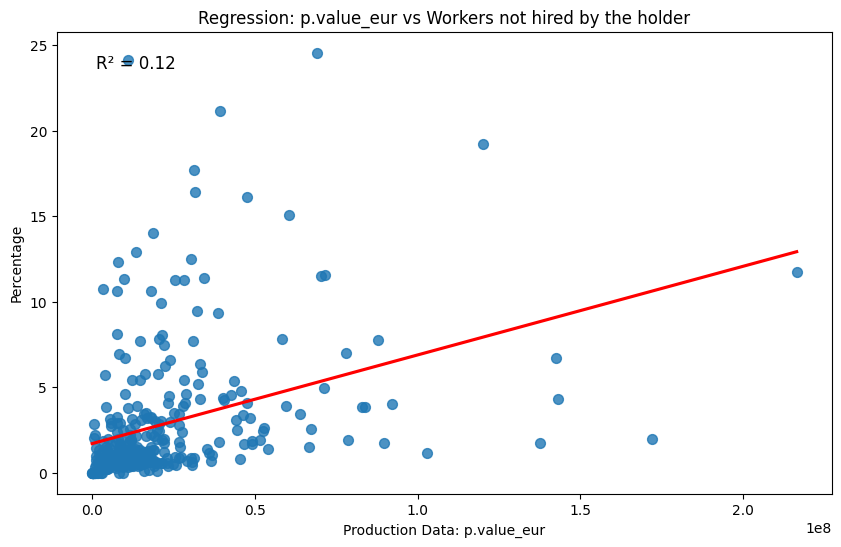

   Production Data                       Labor Type        R²
0        p.area_ha              Family labour force  0.010717
1        p.area_ha                           Holder  0.001400
2        p.area_ha                           Spouse  0.008057
3        p.area_ha             Other family members  0.045923
4        p.area_ha          Non-family labour force  0.010717
5        p.area_ha                          Regular  0.003010
6        p.area_ha                      Non-regular  0.012525
7        p.area_ha  Workers not hired by the holder  0.018459
8      p.value_eur              Family labour force  0.247524
9      p.value_eur                           Holder  0.220133
10     p.value_eur                           Spouse  0.167389
11     p.value_eur             Other family members  0.126092
12     p.value_eur          Non-family labour force  0.247524
13     p.value_eur                          Regular  0.201533
14     p.value_eur                      Non-regular  0.085500
15     p

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Definir las columnas de producción y tipos de fuerza laboral de interés
prod_data = ['p.area_ha', 'p.value_eur']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# Lista para almacenar los resultados de regresión
regression_results = []

# Iterar sobre cada columna de producción y tipo de fuerza laboral
for datos_prod in prod_data:
    for tipo_labor in tipos_labor:
        # Filtrar los dataframes por columna de producción y tipo de fuerza laboral
        df_prod_filtrado = prod4_df[[datos_prod, 'region_name']]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_prod_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # Asegurarse de que haya suficientes datos para realizar el análisis
        if len(df_combinado) > 1:
            # Ajustar el modelo de regresión lineal y calcular R²
            X = df_combinado[datos_prod].values.reshape(-1, 1)
            y = df_combinado['percentage'].values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            
            # Almacenar los resultados en la lista
            regression_results.append({
                'Production Data': datos_prod,
                'Labor Type': tipo_labor,
                'R²': r2
            })
            
            # Crear el scatter plot con línea de regresión
            plt.figure(figsize=(10, 6))
            sns.regplot(x=datos_prod, y='percentage', data=df_combinado, ci=None, scatter_kws={'s':50}, line_kws={'color':'red'})
            
            # Añadir R² al gráfico
            plt.text(0.05, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
            
            # Añadir títulos y etiquetas
            plt.title(f'Regression: {datos_prod} vs {tipo_labor}')
            plt.xlabel(f'Production Data: {datos_prod}')
            plt.ylabel('Percentage')
            plt.grid(False)
            plt.show()

# Crear un dataframe a partir de la lista de resultados de regresión
df_regression_results = pd.DataFrame(regression_results)

# Mostrar los resultados de regresión
print(df_regression_results)

In [82]:
# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
prod4_df['region_name_nuts2'] = prod4_df['region_name_nuts2'].str.strip()
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['region_name_nuts2'].str.strip()